# Ideas I liked


1. red wines : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# Regression

https://www.kaggle.com/mirichoi0218/insurance

grade prediction among students

https://www.kaggle.com/larsen0966/student-performance-data-set

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [58]:
wines_df = pd.read_csv("./winequality-red.csv")

In [59]:
wines_df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [60]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


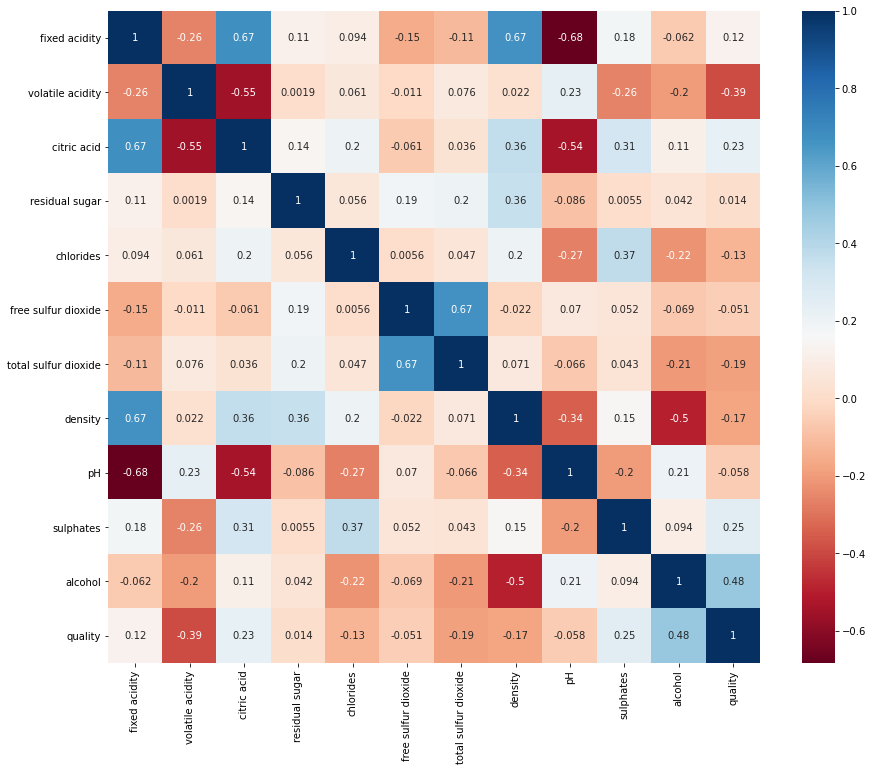

In [61]:

colormap = plt.cm.RdBu

sns.heatmap(wines_df.corr(), annot=True, cmap=colormap,square=True )

fig = plt.gcf()
fig.set_size_inches(15, 12)


plt.show()

In [62]:
good_wines = wines_df.loc[wines_df["quality"]>=6]["quality"].size

percentage_from_total = good_wines/ wines_df.index.size


percentage_from_total

0.5347091932457786

### checked the percentage wines with quality greater than 6 in the data


[5 6 7 4 8 3]


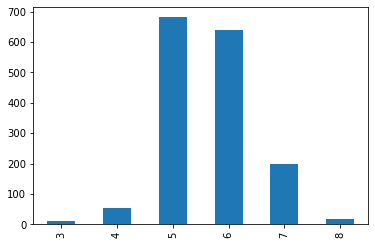

In [63]:
print(wines_df["quality"].unique())

wines_df["quality"].value_counts().sort_index().plot.bar()

In [64]:
wines_df.corr()["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [86]:
EPSILON = 0.15

low_correlation_labels = wines_df.corr()[["quality"]].loc[(wines_df.corr()["quality"]< EPSILON) & (wines_df.corr()["quality"]> -EPSILON)].sort_values(by=["quality"],ascending=False)

print(low_correlation_labels)


                      quality
fixed acidity        0.124052
residual sugar       0.013732
free sulfur dioxide -0.050656
pH                  -0.057731
chlorides           -0.128907


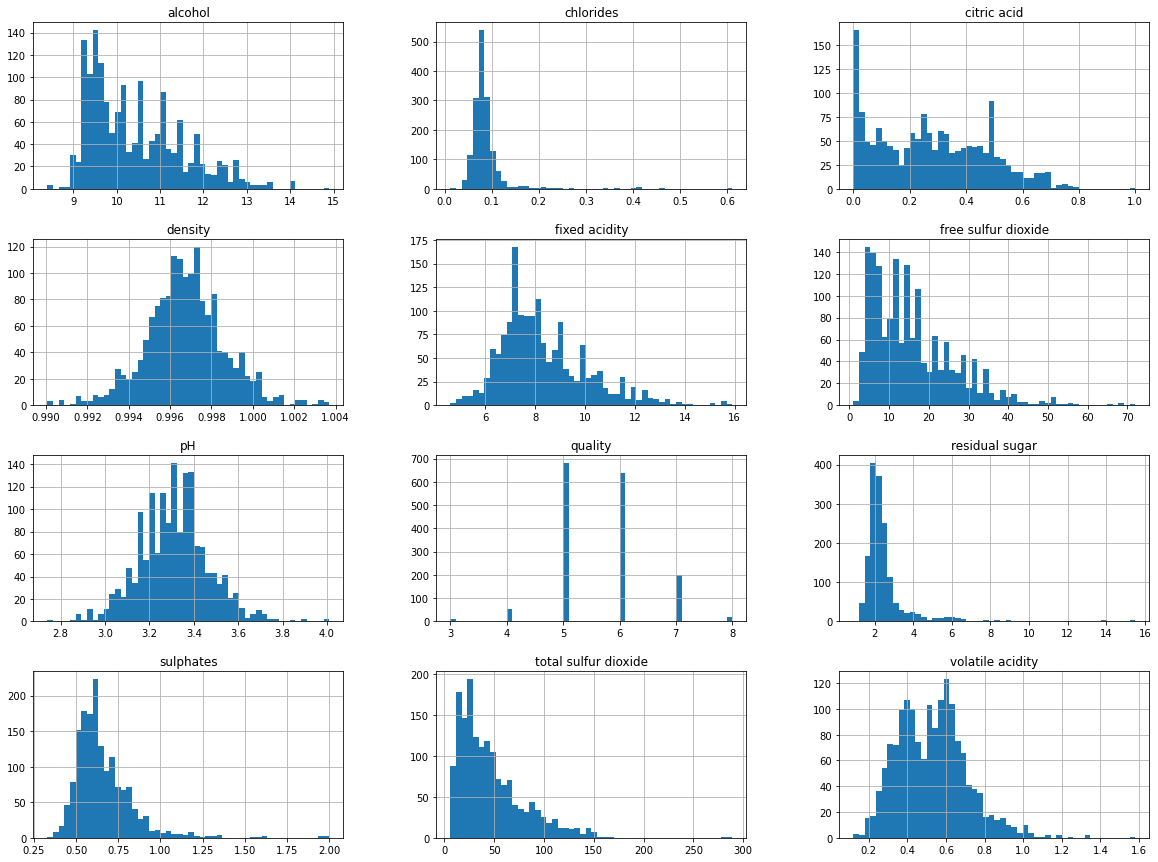

In [87]:
wines_df.hist(bins=50, figsize=(20,15))
plt.show()

In [88]:
binerizer = preprocessing.Binarizer(threshold=5)

binerized_quality = binerizer.transform(wines_df[["quality"]])

wines_binarized_quality = wines_df.drop(columns = ["quality"])

wines_binarized_quality["is_good"]= binerized_quality


wines_binarized_quality.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


# Cleaning the data

Dropping column with correlation that is $\in [-0.1,0.1]$

The data in these columns isn't going to help the machine learning algorithm since the correlation is close to zero

In [89]:

print(list(low_correlation_labels.index))
santinsed_wines_data = wines_binarized_quality.drop(columns=list(low_correlation_labels.index))
santinsed_wines_data

['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'pH', 'chlorides']


,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,is_good
0,0.700,0.00,34.0,0.99780,0.56,9.4,0
1,0.880,0.00,67.0,0.99680,0.68,9.8,0
2,0.760,0.04,54.0,0.99700,0.65,9.8,0
3,0.280,0.56,60.0,0.99800,0.58,9.8,1
4,0.700,0.00,34.0,0.99780,0.56,9.4,0
...,...,...,...,...,...,...,...
1594,0.600,0.08,44.0,0.99490,0.58,10.5,0
1595,0.550,0.10,51.0,0.99512,0.76,11.2,1
1596,0.510,0.13,40.0,0.99574,0.75,11.0,1
1597,0.645,0.12,44.0,0.99547,0.71,10.2,0


In [121]:
target_label = santinsed_wines_data['is_good']
wines_without_target = santinsed_wines_data.drop(columns=['is_good'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(wines_without_target,target_label , test_size=0.2 ,random_state=42)

x_train

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
493,0.690,0.31,81.0,1.00020,0.74,11.6
354,0.210,0.40,165.0,0.99120,0.59,11.9
342,0.390,0.47,14.0,0.99820,0.75,9.8
834,0.685,0.26,23.0,0.99694,0.47,9.4
705,1.035,0.15,54.0,0.99900,0.49,9.9
...,...,...,...,...,...,...
1130,0.600,0.00,10.0,0.99770,0.63,10.4
1294,0.635,0.10,60.0,0.99638,0.75,10.9
860,0.620,0.06,85.0,0.99746,0.54,9.5
1459,0.200,0.35,15.0,0.99458,0.80,11.9


In [122]:
min_max = MinMaxScaler()
x_train = min_max.fit_transform(x_train)
x_test = min_max.fit_transform(x_test)

In [123]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Machine learning time
1. comparing between 3 classification algorithms
2. tunning each
3. conclusion on which one is the one that suits the best

In [207]:
knn_cls = KNeighborsClassifier()
knn_cls.fit(x_train,y_train)
prediction_on_test = knn_cls.predict(x_test)

accuracy_score(y_test,prediction_on_test)

0.7625

In [221]:
knn_scores = cross_val_score(estimator = knn_cls, X = x_train, y = y_train, cv = 10,scoring='accuracy')
print(knn_scores.mean())
print(knn_scores.std())

0.7162093996062993
0.02395142410031666


In [208]:
logres_cls = LogisticRegression(max_iter=1000)
logres_cls.fit(x_train,y_train)

prediction_on_test = logres_cls.predict(x_test)

accuracy_score(y_test,prediction_on_test)


0.734375

In [220]:
logres_score = cross_val_score(estimator = logres_cls, X = x_train, y = y_train, cv = 10,scoring='accuracy')
print(logres_score.mean())
print(logres_score.std())

0.7435716043307087
0.04013462261276694


In [217]:
forest_cls = RandomForestClassifier()
forest_cls.fit(x_train,y_train)

prediction_on_test = forest_cls.predict(x_test)

accuracy_score(y_test,prediction_on_test)



0.78125

In [219]:
forest_score = cross_val_score(estimator = forest_cls, X = x_train, y = y_train, cv = 10, scoring='accuracy')
print(forest_score.mean())
print(forest_score.std())

0.8045767716535434
0.035461679091755946


## tuning each model:
